In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from itertools import product
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Carrier,Item Quantity,City,Country,Status,Weight,Shipping Date,Delivery Date,Delivery Duration
0,A,2.0,Jeddah,SA,Delivered,0.0625,2021-09-30,2021-10-02,2
1,A,2.0,Madinah,SA,Delivered,0.3450,2021-09-30,2021-10-03,3
2,A,3.0,Makkah,SA,Delivered,2.1000,2021-09-30,2021-10-03,3
3,B,1.0,Riyadh,SA,Delivered,0.7000,2021-09-30,2021-10-03,3
4,B,2.0,Riyadh,SA,Delivered,1.4000,2021-09-30,2021-10-02,2


In [3]:
df['Carrier'] = df['Carrier'].astype("category")
df['City'] = df['City'].astype("category")
df['Shipping Date'] =  pd.to_datetime(df['Shipping Date'])
df['Year'] = df['Shipping Date'].dt.year.astype("category")
df['Month'] = df['Shipping Date'].dt.month.astype("category")
df['Day'] = df['Shipping Date'].dt.day.astype("category")
df['DayOfWeek'] = df['Shipping Date'].dt.dayofweek.astype("category")

In [5]:
def duration_classes(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    elif x > 1 and x <= 3:
        return 2
    elif x > 3 and x <= 7:
        return 3
    elif x > 7 and x <= 10:
        return 4
    elif x > 10 and x <= 15:
        return 5
    elif x > 15 and x <= 30:
        return 6
    else:
        return 7
    
df['Delivery Duration'] = df['Delivery Duration'].apply(duration_classes).astype('category')

In [6]:
df.drop(['Country', 'Status', 'Delivery Date','Item Quantity', 'Shipping Date'], axis=1, inplace=True)
df.head()

,Carrier,City,Weight,Delivery Duration,Year,Month,Day,DayOfWeek
0,A,Jeddah,0.0625,2,2021,9,30,3
1,A,Madinah,0.3450,2,2021,9,30,3
2,A,Makkah,2.1000,2,2021,9,30,3
3,B,Riyadh,0.7000,2,2021,9,30,3
4,B,Riyadh,1.4000,2,2021,9,30,3


In [7]:
y = df['Delivery Duration']
X = df.drop('Delivery Duration', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [9]:
from catboost import CatBoostRegressor,CatBoostClassifier, Pool
# initialize Pool
train_pool = Pool(X_train,
                  y_train,
                  cat_features=[0,1,3,4,5,6])
test_pool = Pool(X_test,
                 y_test,
                 cat_features=[0,1,3,4,5,6])

# specify the training parameters
model = CatBoostClassifier(#iterations=2,
                          #depth=2,)
)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

Learning rate set to 0.101566
0:	learn: 1.8862698	total: 844ms	remaining: 14m 3s
1:	learn: 1.7486005	total: 1.78s	remaining: 14m 49s
2:	learn: 1.6451155	total: 2.84s	remaining: 15m 42s
3:	learn: 1.5662170	total: 3.61s	remaining: 14m 58s
4:	learn: 1.4750211	total: 4.97s	remaining: 16m 29s
5:	learn: 1.4016987	total: 6.33s	remaining: 17m 28s
6:	learn: 1.3428292	total: 7.65s	remaining: 18m 4s
7:	learn: 1.2923879	total: 9.19s	remaining: 19m
8:	learn: 1.2479692	total: 10.7s	remaining: 19m 42s
9:	learn: 1.2076107	total: 12.3s	remaining: 20m 19s
10:	learn: 1.1697380	total: 13.8s	remaining: 20m 41s
11:	learn: 1.1382031	total: 15.6s	remaining: 21m 22s
12:	learn: 1.1095827	total: 17.2s	remaining: 21m 48s
13:	learn: 1.0853835	total: 18.8s	remaining: 22m 7s
14:	learn: 1.0640444	total: 20.4s	remaining: 22m 17s
15:	learn: 1.0445354	total: 22s	remaining: 22m 32s
16:	learn: 1.0141930	total: 23.4s	remaining: 22m 31s
17:	learn: 0.9888349	total: 24.8s	remaining: 22m 31s
18:	learn: 0.9723327	total: 26.3s	r

153:	learn: 0.7588277	total: 5m 25s	remaining: 29m 49s
154:	learn: 0.7587076	total: 5m 28s	remaining: 29m 48s
155:	learn: 0.7585601	total: 5m 30s	remaining: 29m 50s
156:	learn: 0.7584774	total: 5m 33s	remaining: 29m 53s
157:	learn: 0.7583734	total: 5m 36s	remaining: 29m 54s
158:	learn: 0.7582950	total: 5m 38s	remaining: 29m 53s
159:	learn: 0.7582387	total: 5m 41s	remaining: 29m 52s
160:	learn: 0.7580311	total: 5m 43s	remaining: 29m 52s
161:	learn: 0.7578787	total: 5m 46s	remaining: 29m 52s
162:	learn: 0.7576446	total: 5m 48s	remaining: 29m 49s
163:	learn: 0.7574909	total: 5m 50s	remaining: 29m 48s
164:	learn: 0.7573342	total: 5m 53s	remaining: 29m 48s
165:	learn: 0.7571539	total: 5m 55s	remaining: 29m 46s
166:	learn: 0.7569646	total: 5m 57s	remaining: 29m 44s
167:	learn: 0.7569288	total: 6m	remaining: 29m 44s
168:	learn: 0.7566277	total: 6m 2s	remaining: 29m 43s
169:	learn: 0.7564113	total: 6m 5s	remaining: 29m 43s
170:	learn: 0.7562122	total: 6m 7s	remaining: 29m 41s
171:	learn: 0.756

303:	learn: 0.7405284	total: 11m 53s	remaining: 27m 13s
304:	learn: 0.7404507	total: 11m 56s	remaining: 27m 12s
305:	learn: 0.7403254	total: 11m 58s	remaining: 27m 10s
306:	learn: 0.7403001	total: 12m 1s	remaining: 27m 8s
307:	learn: 0.7401724	total: 12m 3s	remaining: 27m 5s
308:	learn: 0.7401141	total: 12m 5s	remaining: 27m 3s
309:	learn: 0.7399101	total: 12m 8s	remaining: 27m 2s
310:	learn: 0.7398723	total: 12m 11s	remaining: 27m
311:	learn: 0.7397905	total: 12m 13s	remaining: 26m 58s
312:	learn: 0.7396414	total: 12m 16s	remaining: 26m 57s
313:	learn: 0.7395888	total: 12m 19s	remaining: 26m 54s
314:	learn: 0.7395443	total: 12m 21s	remaining: 26m 52s
315:	learn: 0.7394949	total: 12m 24s	remaining: 26m 50s
316:	learn: 0.7394286	total: 12m 26s	remaining: 26m 48s
317:	learn: 0.7393411	total: 12m 28s	remaining: 26m 46s
318:	learn: 0.7391783	total: 12m 31s	remaining: 26m 44s
319:	learn: 0.7391432	total: 12m 33s	remaining: 26m 41s
320:	learn: 0.7390901	total: 12m 35s	remaining: 26m 39s
321:

451:	learn: 0.7290621	total: 18m 28s	remaining: 22m 23s
452:	learn: 0.7289682	total: 18m 30s	remaining: 22m 21s
453:	learn: 0.7289327	total: 18m 33s	remaining: 22m 18s
454:	learn: 0.7288346	total: 18m 36s	remaining: 22m 17s
455:	learn: 0.7287478	total: 18m 39s	remaining: 22m 15s
456:	learn: 0.7286103	total: 18m 42s	remaining: 22m 13s
457:	learn: 0.7285926	total: 18m 44s	remaining: 22m 10s
458:	learn: 0.7284903	total: 18m 46s	remaining: 22m 8s
459:	learn: 0.7284105	total: 18m 49s	remaining: 22m 5s
460:	learn: 0.7282950	total: 18m 51s	remaining: 22m 2s
461:	learn: 0.7282111	total: 18m 53s	remaining: 22m
462:	learn: 0.7281911	total: 18m 55s	remaining: 21m 57s
463:	learn: 0.7281387	total: 18m 57s	remaining: 21m 54s
464:	learn: 0.7280483	total: 18m 59s	remaining: 21m 51s
465:	learn: 0.7280343	total: 19m 2s	remaining: 21m 48s
466:	learn: 0.7279789	total: 19m 4s	remaining: 21m 45s
467:	learn: 0.7279060	total: 19m 6s	remaining: 21m 43s
468:	learn: 0.7278426	total: 19m 9s	remaining: 21m 41s
469

599:	learn: 0.7189349	total: 24m 27s	remaining: 16m 18s
600:	learn: 0.7188350	total: 24m 29s	remaining: 16m 15s
601:	learn: 0.7187075	total: 24m 32s	remaining: 16m 13s
602:	learn: 0.7185588	total: 24m 35s	remaining: 16m 11s
603:	learn: 0.7184850	total: 24m 38s	remaining: 16m 9s
604:	learn: 0.7183830	total: 24m 41s	remaining: 16m 6s
605:	learn: 0.7182816	total: 24m 43s	remaining: 16m 4s
606:	learn: 0.7181551	total: 24m 45s	remaining: 16m 2s
607:	learn: 0.7181019	total: 24m 48s	remaining: 15m 59s
608:	learn: 0.7180287	total: 24m 50s	remaining: 15m 56s
609:	learn: 0.7179358	total: 24m 52s	remaining: 15m 54s
610:	learn: 0.7178486	total: 24m 54s	remaining: 15m 51s
611:	learn: 0.7177571	total: 24m 57s	remaining: 15m 49s
612:	learn: 0.7176904	total: 24m 59s	remaining: 15m 46s
613:	learn: 0.7176540	total: 25m 2s	remaining: 15m 44s
614:	learn: 0.7176367	total: 25m 4s	remaining: 15m 41s
615:	learn: 0.7175118	total: 25m 6s	remaining: 15m 39s
616:	learn: 0.7174489	total: 25m 8s	remaining: 15m 36s


747:	learn: 0.7085913	total: 30m 23s	remaining: 10m 14s
748:	learn: 0.7085627	total: 30m 25s	remaining: 10m 11s
749:	learn: 0.7085282	total: 30m 27s	remaining: 10m 9s
750:	learn: 0.7084553	total: 30m 29s	remaining: 10m 6s
751:	learn: 0.7083973	total: 30m 32s	remaining: 10m 4s
752:	learn: 0.7083599	total: 30m 34s	remaining: 10m 1s
753:	learn: 0.7082435	total: 30m 37s	remaining: 9m 59s
754:	learn: 0.7081409	total: 30m 40s	remaining: 9m 57s
755:	learn: 0.7080956	total: 30m 42s	remaining: 9m 54s
756:	learn: 0.7080481	total: 30m 45s	remaining: 9m 52s
757:	learn: 0.7080293	total: 30m 46s	remaining: 9m 49s
758:	learn: 0.7079893	total: 30m 49s	remaining: 9m 47s
759:	learn: 0.7079595	total: 30m 51s	remaining: 9m 44s
760:	learn: 0.7078662	total: 30m 53s	remaining: 9m 41s
761:	learn: 0.7078076	total: 30m 55s	remaining: 9m 39s
762:	learn: 0.7077178	total: 30m 58s	remaining: 9m 37s
763:	learn: 0.7076882	total: 31m	remaining: 9m 34s
764:	learn: 0.7076476	total: 31m 2s	remaining: 9m 32s
765:	learn: 0

898:	learn: 0.6995832	total: 36m 13s	remaining: 4m 4s
899:	learn: 0.6995298	total: 36m 16s	remaining: 4m 1s
900:	learn: 0.6994735	total: 36m 18s	remaining: 3m 59s
901:	learn: 0.6993456	total: 36m 21s	remaining: 3m 57s
902:	learn: 0.6993327	total: 36m 24s	remaining: 3m 54s
903:	learn: 0.6992505	total: 36m 26s	remaining: 3m 52s
904:	learn: 0.6992035	total: 36m 28s	remaining: 3m 49s
905:	learn: 0.6991106	total: 36m 31s	remaining: 3m 47s
906:	learn: 0.6990820	total: 36m 33s	remaining: 3m 44s
907:	learn: 0.6990246	total: 36m 36s	remaining: 3m 42s
908:	learn: 0.6989401	total: 36m 39s	remaining: 3m 40s
909:	learn: 0.6988827	total: 36m 42s	remaining: 3m 37s
910:	learn: 0.6987788	total: 36m 44s	remaining: 3m 35s
911:	learn: 0.6987023	total: 36m 47s	remaining: 3m 32s
912:	learn: 0.6986392	total: 36m 49s	remaining: 3m 30s
913:	learn: 0.6985665	total: 36m 52s	remaining: 3m 28s
914:	learn: 0.6984990	total: 36m 54s	remaining: 3m 25s
915:	learn: 0.6984142	total: 36m 56s	remaining: 3m 23s
916:	learn: 

In [10]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      8014
           1       0.67      0.71      0.69     11682
           2       0.75      0.68      0.72     11181
           3       0.70      0.38      0.49      2280
           4       0.68      0.16      0.26       165
           5       0.33      0.13      0.19        69
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00         2

    accuracy                           0.70     33412
   macro avg       0.48      0.36      0.39     33412
weighted avg       0.70      0.70      0.70     33412



C:\Users\ENG_Aaref\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ENG_Aaref\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ENG_Aaref\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
xgb_model = XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
accuracy_score(y_test, xgb_preds)

0.699290507094929

In [11]:
from sklearn.utils import resample

time_4 = df[(df['Delivery Duration'] == 4)]
time_5 = df[(df['Delivery Duration'] == 5)]
time_6 = df[(df['Delivery Duration'] == 6)]
time_7 = df[(df['Delivery Duration'] == 7)]

avgtime = df.loc[~((df['Delivery Duration'] == 4) | (df['Delivery Duration'] == 5) | (df['Delivery Duration'] == 6) | (df['Delivery Duration'] == 7))]

upsampled_time_4 = resample(time_4,
                             replace=True,
                             n_samples=8000)


upsampled_time_5 = resample(time_5,
                             replace=True,
                             n_samples=4000)


upsampled_time_6 = resample(time_6,
                             replace=True,
                             n_samples=3000)


upsampled_time_7 = resample(time_7,
                             replace=True,
                             n_samples=1000)

In [12]:
df['Delivery Duration'].value_counts()

Delivery Duration
1    58897
2    54940
0    40770
3    11211
4      807
5      321
6       96
7       14
Name: count, dtype: int64

In [13]:
new_df = pd.concat([upsampled_time_4,upsampled_time_5,upsampled_time_6,upsampled_time_7,avgtime],axis=0)

In [14]:
new_df['Delivery Duration'].value_counts()

Delivery Duration
1    58897
2    54940
0    40770
3    11211
4     8000
5     4000
6     3000
7     1000
Name: count, dtype: int64

In [15]:
y = new_df['Delivery Duration']
X = new_df.drop('Delivery Duration', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

# initialize Pool
train_pool = Pool(X_train,
                  y_train,
                  cat_features=[0,1,3,4,5,6])
test_pool = Pool(X_test,
                 y_test,
                 cat_features=[0,1,3,4,5,6])

# specify the training parameters
model = CatBoostClassifier(#iterations=2,
                          #depth=2,)
#                             loss_function='MultiClass'
)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

Learning rate set to 0.102005
0:	learn: 1.9203025	total: 2.16s	remaining: 35m 56s
1:	learn: 1.8118181	total: 4.01s	remaining: 33m 22s
2:	learn: 1.7138206	total: 6.55s	remaining: 36m 16s
3:	learn: 1.6272444	total: 8.83s	remaining: 36m 38s
4:	learn: 1.5584403	total: 11.1s	remaining: 36m 44s
5:	learn: 1.5033852	total: 13.3s	remaining: 36m 41s
6:	learn: 1.4557208	total: 15.5s	remaining: 36m 34s
7:	learn: 1.4151244	total: 17.8s	remaining: 36m 44s
8:	learn: 1.3786516	total: 19.7s	remaining: 36m 13s
9:	learn: 1.3438628	total: 21.8s	remaining: 36m 2s
10:	learn: 1.3151174	total: 24s	remaining: 35m 58s
11:	learn: 1.2879515	total: 26.1s	remaining: 35m 47s
12:	learn: 1.2636853	total: 28.1s	remaining: 35m 35s
13:	learn: 1.2320622	total: 30.3s	remaining: 35m 34s
14:	learn: 1.2018588	total: 32.4s	remaining: 35m 28s
15:	learn: 1.1852052	total: 34.4s	remaining: 35m 17s
16:	learn: 1.1699519	total: 36.5s	remaining: 35m 8s
17:	learn: 1.1375296	total: 38.6s	remaining: 35m 6s
18:	learn: 1.1127438	total: 40.

153:	learn: 0.8261902	total: 5m 43s	remaining: 31m 28s
154:	learn: 0.8260008	total: 5m 45s	remaining: 31m 24s
155:	learn: 0.8258422	total: 5m 47s	remaining: 31m 21s
156:	learn: 0.8257158	total: 5m 49s	remaining: 31m 17s
157:	learn: 0.8254731	total: 5m 52s	remaining: 31m 16s
158:	learn: 0.8249787	total: 5m 54s	remaining: 31m 13s
159:	learn: 0.8248644	total: 5m 56s	remaining: 31m 10s
160:	learn: 0.8247048	total: 5m 58s	remaining: 31m 9s
161:	learn: 0.8244347	total: 6m	remaining: 31m 5s
162:	learn: 0.8242722	total: 6m 2s	remaining: 31m 2s
163:	learn: 0.8238511	total: 6m 5s	remaining: 31m
164:	learn: 0.8236971	total: 6m 7s	remaining: 30m 58s
165:	learn: 0.8231910	total: 6m 9s	remaining: 30m 56s
166:	learn: 0.8229220	total: 6m 11s	remaining: 30m 53s
167:	learn: 0.8225998	total: 6m 13s	remaining: 30m 49s
168:	learn: 0.8221603	total: 6m 16s	remaining: 30m 49s
169:	learn: 0.8219580	total: 6m 18s	remaining: 30m 45s
170:	learn: 0.8216861	total: 6m 20s	remaining: 30m 43s
171:	learn: 0.8214233	tot

303:	learn: 0.7964097	total: 11m 16s	remaining: 25m 49s
304:	learn: 0.7963405	total: 11m 19s	remaining: 25m 47s
305:	learn: 0.7962051	total: 11m 21s	remaining: 25m 44s
306:	learn: 0.7961609	total: 11m 23s	remaining: 25m 42s
307:	learn: 0.7960674	total: 11m 25s	remaining: 25m 39s
308:	learn: 0.7959835	total: 11m 27s	remaining: 25m 37s
309:	learn: 0.7959349	total: 11m 29s	remaining: 25m 35s
310:	learn: 0.7958050	total: 11m 31s	remaining: 25m 32s
311:	learn: 0.7957600	total: 11m 33s	remaining: 25m 29s
312:	learn: 0.7957012	total: 11m 36s	remaining: 25m 28s
313:	learn: 0.7955915	total: 11m 38s	remaining: 25m 26s
314:	learn: 0.7953958	total: 11m 40s	remaining: 25m 23s
315:	learn: 0.7952420	total: 11m 42s	remaining: 25m 20s
316:	learn: 0.7949726	total: 11m 44s	remaining: 25m 18s
317:	learn: 0.7946988	total: 11m 47s	remaining: 25m 16s
318:	learn: 0.7946435	total: 11m 49s	remaining: 25m 15s
319:	learn: 0.7945063	total: 11m 52s	remaining: 25m 13s
320:	learn: 0.7943783	total: 11m 54s	remaining: 

451:	learn: 0.7810967	total: 16m 49s	remaining: 20m 24s
452:	learn: 0.7810418	total: 16m 51s	remaining: 20m 21s
453:	learn: 0.7809707	total: 16m 53s	remaining: 20m 19s
454:	learn: 0.7808836	total: 16m 56s	remaining: 20m 17s
455:	learn: 0.7806911	total: 16m 58s	remaining: 20m 15s
456:	learn: 0.7805980	total: 17m 1s	remaining: 20m 13s
457:	learn: 0.7805226	total: 17m 3s	remaining: 20m 10s
458:	learn: 0.7804637	total: 17m 5s	remaining: 20m 8s
459:	learn: 0.7804199	total: 17m 7s	remaining: 20m 6s
460:	learn: 0.7803244	total: 17m 10s	remaining: 20m 4s
461:	learn: 0.7802976	total: 17m 12s	remaining: 20m 2s
462:	learn: 0.7802104	total: 17m 14s	remaining: 20m
463:	learn: 0.7801117	total: 17m 16s	remaining: 19m 57s
464:	learn: 0.7799388	total: 17m 19s	remaining: 19m 55s
465:	learn: 0.7798640	total: 17m 21s	remaining: 19m 53s
466:	learn: 0.7798107	total: 17m 23s	remaining: 19m 50s
467:	learn: 0.7797311	total: 17m 26s	remaining: 19m 49s
468:	learn: 0.7796130	total: 17m 28s	remaining: 19m 46s
469:

599:	learn: 0.7685317	total: 22m 24s	remaining: 14m 56s
600:	learn: 0.7684754	total: 22m 26s	remaining: 14m 54s
601:	learn: 0.7684004	total: 22m 28s	remaining: 14m 51s
602:	learn: 0.7683072	total: 22m 31s	remaining: 14m 49s
603:	learn: 0.7682863	total: 22m 33s	remaining: 14m 47s
604:	learn: 0.7682550	total: 22m 35s	remaining: 14m 44s
605:	learn: 0.7682162	total: 22m 37s	remaining: 14m 42s
606:	learn: 0.7681472	total: 22m 39s	remaining: 14m 40s
607:	learn: 0.7680675	total: 22m 41s	remaining: 14m 37s
608:	learn: 0.7680456	total: 22m 43s	remaining: 14m 35s
609:	learn: 0.7677789	total: 22m 46s	remaining: 14m 33s
610:	learn: 0.7677245	total: 22m 48s	remaining: 14m 31s
611:	learn: 0.7675666	total: 22m 51s	remaining: 14m 29s
612:	learn: 0.7674464	total: 22m 53s	remaining: 14m 27s
613:	learn: 0.7673601	total: 22m 56s	remaining: 14m 25s
614:	learn: 0.7673217	total: 22m 58s	remaining: 14m 22s
615:	learn: 0.7672784	total: 23m	remaining: 14m 20s
616:	learn: 0.7672401	total: 23m 2s	remaining: 14m 1

747:	learn: 0.7558903	total: 28m 8s	remaining: 9m 28s
748:	learn: 0.7557760	total: 28m 10s	remaining: 9m 26s
749:	learn: 0.7556870	total: 28m 12s	remaining: 9m 24s
750:	learn: 0.7554822	total: 28m 15s	remaining: 9m 22s
751:	learn: 0.7553459	total: 28m 17s	remaining: 9m 19s
752:	learn: 0.7552741	total: 28m 20s	remaining: 9m 17s
753:	learn: 0.7550377	total: 28m 22s	remaining: 9m 15s
754:	learn: 0.7549628	total: 28m 24s	remaining: 9m 13s
755:	learn: 0.7548495	total: 28m 26s	remaining: 9m 10s
756:	learn: 0.7547739	total: 28m 29s	remaining: 9m 8s
757:	learn: 0.7546728	total: 28m 32s	remaining: 9m 6s
758:	learn: 0.7546280	total: 28m 34s	remaining: 9m 4s
759:	learn: 0.7546129	total: 28m 36s	remaining: 9m 2s
760:	learn: 0.7545216	total: 28m 38s	remaining: 8m 59s
761:	learn: 0.7544510	total: 28m 40s	remaining: 8m 57s
762:	learn: 0.7543754	total: 28m 42s	remaining: 8m 55s
763:	learn: 0.7543551	total: 28m 44s	remaining: 8m 52s
764:	learn: 0.7543348	total: 28m 46s	remaining: 8m 50s
765:	learn: 0.7

898:	learn: 0.7438382	total: 33m 53s	remaining: 3m 48s
899:	learn: 0.7437599	total: 33m 55s	remaining: 3m 46s
900:	learn: 0.7436378	total: 33m 58s	remaining: 3m 44s
901:	learn: 0.7436020	total: 34m 1s	remaining: 3m 41s
902:	learn: 0.7435064	total: 34m 3s	remaining: 3m 39s
903:	learn: 0.7434455	total: 34m 5s	remaining: 3m 37s
904:	learn: 0.7434120	total: 34m 8s	remaining: 3m 34s
905:	learn: 0.7433444	total: 34m 10s	remaining: 3m 32s
906:	learn: 0.7432908	total: 34m 12s	remaining: 3m 30s
907:	learn: 0.7432636	total: 34m 14s	remaining: 3m 28s
908:	learn: 0.7432362	total: 34m 16s	remaining: 3m 25s
909:	learn: 0.7431452	total: 34m 18s	remaining: 3m 23s
910:	learn: 0.7430338	total: 34m 21s	remaining: 3m 21s
911:	learn: 0.7429577	total: 34m 24s	remaining: 3m 19s
912:	learn: 0.7428539	total: 34m 26s	remaining: 3m 16s
913:	learn: 0.7427786	total: 34m 28s	remaining: 3m 14s
914:	learn: 0.7427199	total: 34m 30s	remaining: 3m 12s
915:	learn: 0.7426253	total: 34m 33s	remaining: 3m 10s
916:	learn: 0.

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      8130
           1       0.66      0.71      0.68     11837
           2       0.74      0.66      0.70     11037
           3       0.68      0.30      0.42      2213
           4       0.68      0.65      0.67      1598
           5       0.67      0.54      0.60       757
           6       0.66      0.89      0.76       588
           7       0.76      1.00      0.86       204

    accuracy                           0.69     36364
   macro avg       0.69      0.69      0.68     36364
weighted avg       0.69      0.69      0.68     36364



In [17]:
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 3, 10),
#         "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
    }

    model = CatBoostClassifier(**params, silent=True)
    model.fit(train_pool)
    predictions = model.predict(test_pool)
    score = accuracy_score(y_test,predictions)
    return score

In [18]:
# Run This if you want to hyperparamter tunning 
# Warnning: it Would take more than 24 hrs
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)
# print('Best hyperparameters:', study.best_params)
# print('Best SCORE:', study.best_value)

In [21]:
# Save and Load the Model then test it.
model.save_model("model")
model_from_file = CatBoostClassifier()
model_from_file.load_model("model")
pred = model_from_file.predict(['K', 'Dammam', 8.2, 2022, 4, 19, 1])[0]
print(f'Model predicts this order as class ({pred})')

Model predicts this order as class (1)


In [33]:
pred = model_from_file.predict(df[df['Delivery Duration'] == 3].drop('Delivery Duration',axis=1))
pd.Series(np.squeeze(pred)).value_counts()

2    4403
3    3536
1    1555
4     852
0     431
6     219
5     179
7      36
Name: count, dtype: int64

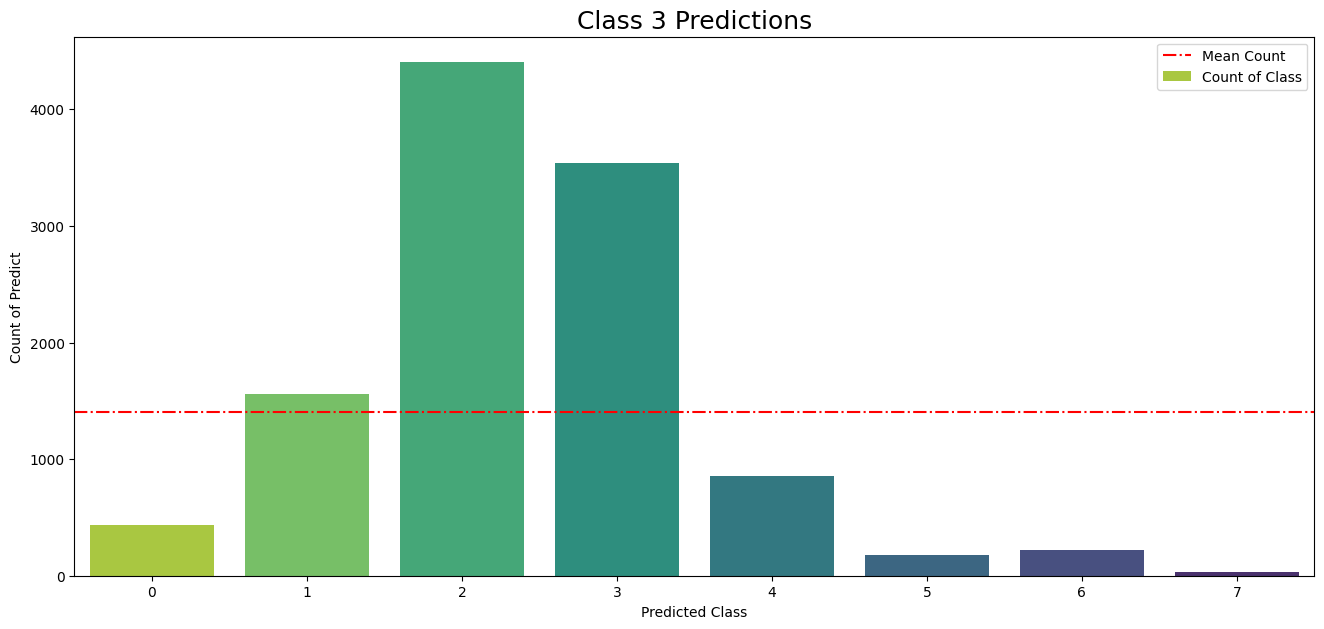

In [40]:
import seaborn as sns
# How Model deal With Class 3
plt.figure(figsize=[16,7])
plt.axhline(y=pd.Series(np.squeeze(pred)).value_counts().mean(), color='r', linestyle='-.',label='Mean Count')
sns.barplot(x=pd.Series(np.squeeze(pred)).value_counts().index,y=pd.Series(np.squeeze(pred)).value_counts().values, palette='viridis_r', label='Count of Class')
plt.title('Class 3 Predictions', fontsize=18)
plt.ylabel('Count of Predict')
plt.xlabel('Predicted Class')
plt.legend();